In [147]:
# Importing essential libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [148]:
dataset = pd.read_csv('data/processed_data.csv',delimiter='\t',encoding='utf-8')

In [149]:
print(dataset['Gender'].unique())
print(dataset['Race'].unique())
print(dataset['Medical_info'].unique())
print(dataset['views'].unique())

['Man' 'Woman' 'No Actor']
['asian' 'indian' 'white' 'No Actor' 'middle eastern' 'black'
 'latino hispanic']
['Low Medical Info' 'High Medical Info']
['low' 'high']


In [150]:
cleanup_nums = {"Gender":     {"Man": 0, "Woman": 1,"No Actor":2},
                "Race": {'asian':0, 'indian' :1,'white':2 ,'No Actor':3 ,'middle eastern':4, 'black':5,'latino hispanic':6},
                "Medical_info":{'Low Medical Info':0,"High Medical Info":1},
                "views":{'low':0,'high':1}
                }

In [151]:
dataset = dataset.replace(cleanup_nums)
dataset.head()

,channelSubscriberCount,viewCount,likeCount,commentCount,channelViewCount,Medical_info,Gender,Race,Age,views
0,2480,377,5,5,1187453,0,0,0,33,0
1,9300,295857,2867,108,786277,0,0,1,29,1
2,53900,2823,14,0,16022717,1,0,2,36,0
3,2640,6944,103,2,211925,0,0,2,39,0
4,39900,15278,29,49,14735644,1,1,2,33,1


In [152]:
print(dataset['Gender'].unique())
print(dataset['Race'].unique())
print(dataset['Medical_info'].unique())
print(dataset['views'].unique())

[0 1 2]
[0 1 2 3 4 5 6]
[0 1]
[0 1]


In [153]:
dataset.head(5)

,channelSubscriberCount,viewCount,likeCount,commentCount,channelViewCount,Medical_info,Gender,Race,Age,views
0,2480,377,5,5,1187453,0,0,0,33,0
1,9300,295857,2867,108,786277,0,0,1,29,1
2,53900,2823,14,0,16022717,1,0,2,36,0
3,2640,6944,103,2,211925,0,0,2,39,0
4,39900,15278,29,49,14735644,1,1,2,33,1


In [154]:
dataset.describe()

,channelSubscriberCount,viewCount,likeCount,commentCount,channelViewCount,Medical_info,Gender,Race,Age,views
count,3.100000e+02,3.100000e+02,310.000000,310.000000,3.100000e+02,310.000000,310.000000,310.000000,310.000000,310.000000
mean,9.755953e+05,1.906581e+05,2464.054839,141.632258,2.467388e+08,0.703226,0.870968,2.512903,22.983871,0.554839
std,3.668744e+06,5.519891e+05,8032.405508,484.751516,1.117136e+09,0.457575,0.860569,1.245638,15.860121,0.497787
min,0.000000e+00,1.500000e+01,0.000000,0.000000,1.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.447500e+03,3.042750e+03,15.250000,0.250000,1.188585e+06,0.000000,0.000000,2.000000,0.000000,0.000000
50%,5.020000e+04,1.609450e+04,152.500000,9.000000,9.244567e+06,1.000000,1.000000,2.000000,31.000000,1.000000
75%,3.010000e+05,8.662825e+04,1402.750000,99.500000,5.820930e+07,1.000000,2.000000,3.000000,34.000000,1.000000
max,3.810000e+07,5.403915e+06,73171.000000,5209.000000,1.258721e+10,1.000000,2.000000,6.000000,47.000000,1.000000


In [155]:
print(dataset.corr()["views"].abs().sort_values(ascending=False))

views                     1.000000
viewCount                 0.303827
likeCount                 0.270354
commentCount              0.251537
Age                       0.159139
channelSubscriberCount    0.133362
Gender                    0.129891
channelViewCount          0.113775
Race                      0.022022
Medical_info              0.000642
Name: views, dtype: float64


<Axes: xlabel='views', ylabel='count'>

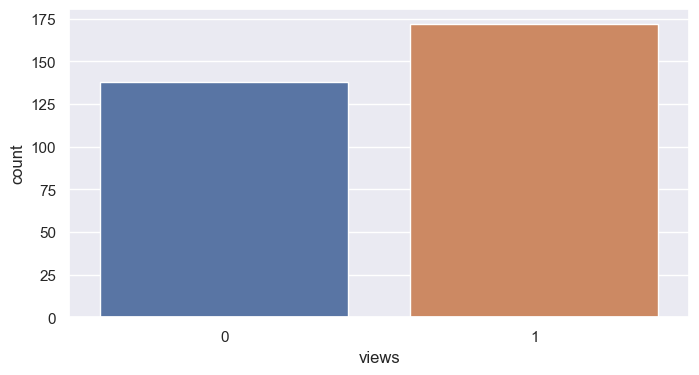

In [156]:
y = dataset["views"]

sns.countplot(x=y)

<Axes: xlabel='Gender', ylabel='count'>

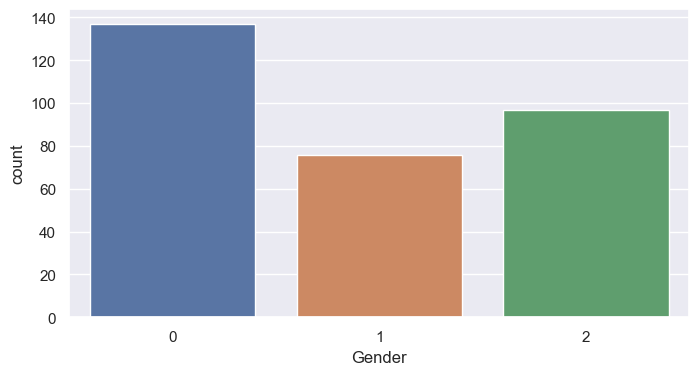

In [157]:
# y = dataset["views"]

sns.countplot(x=dataset["Gender"])

Gender ['Man', 'No Actor', 'Female'] 0
Medical_info ['high', 'low'] 1
Race ['asian', 'indian', 'white', 'No Actor', 'middle eastern', 'black', 'latino hispanic'] 2


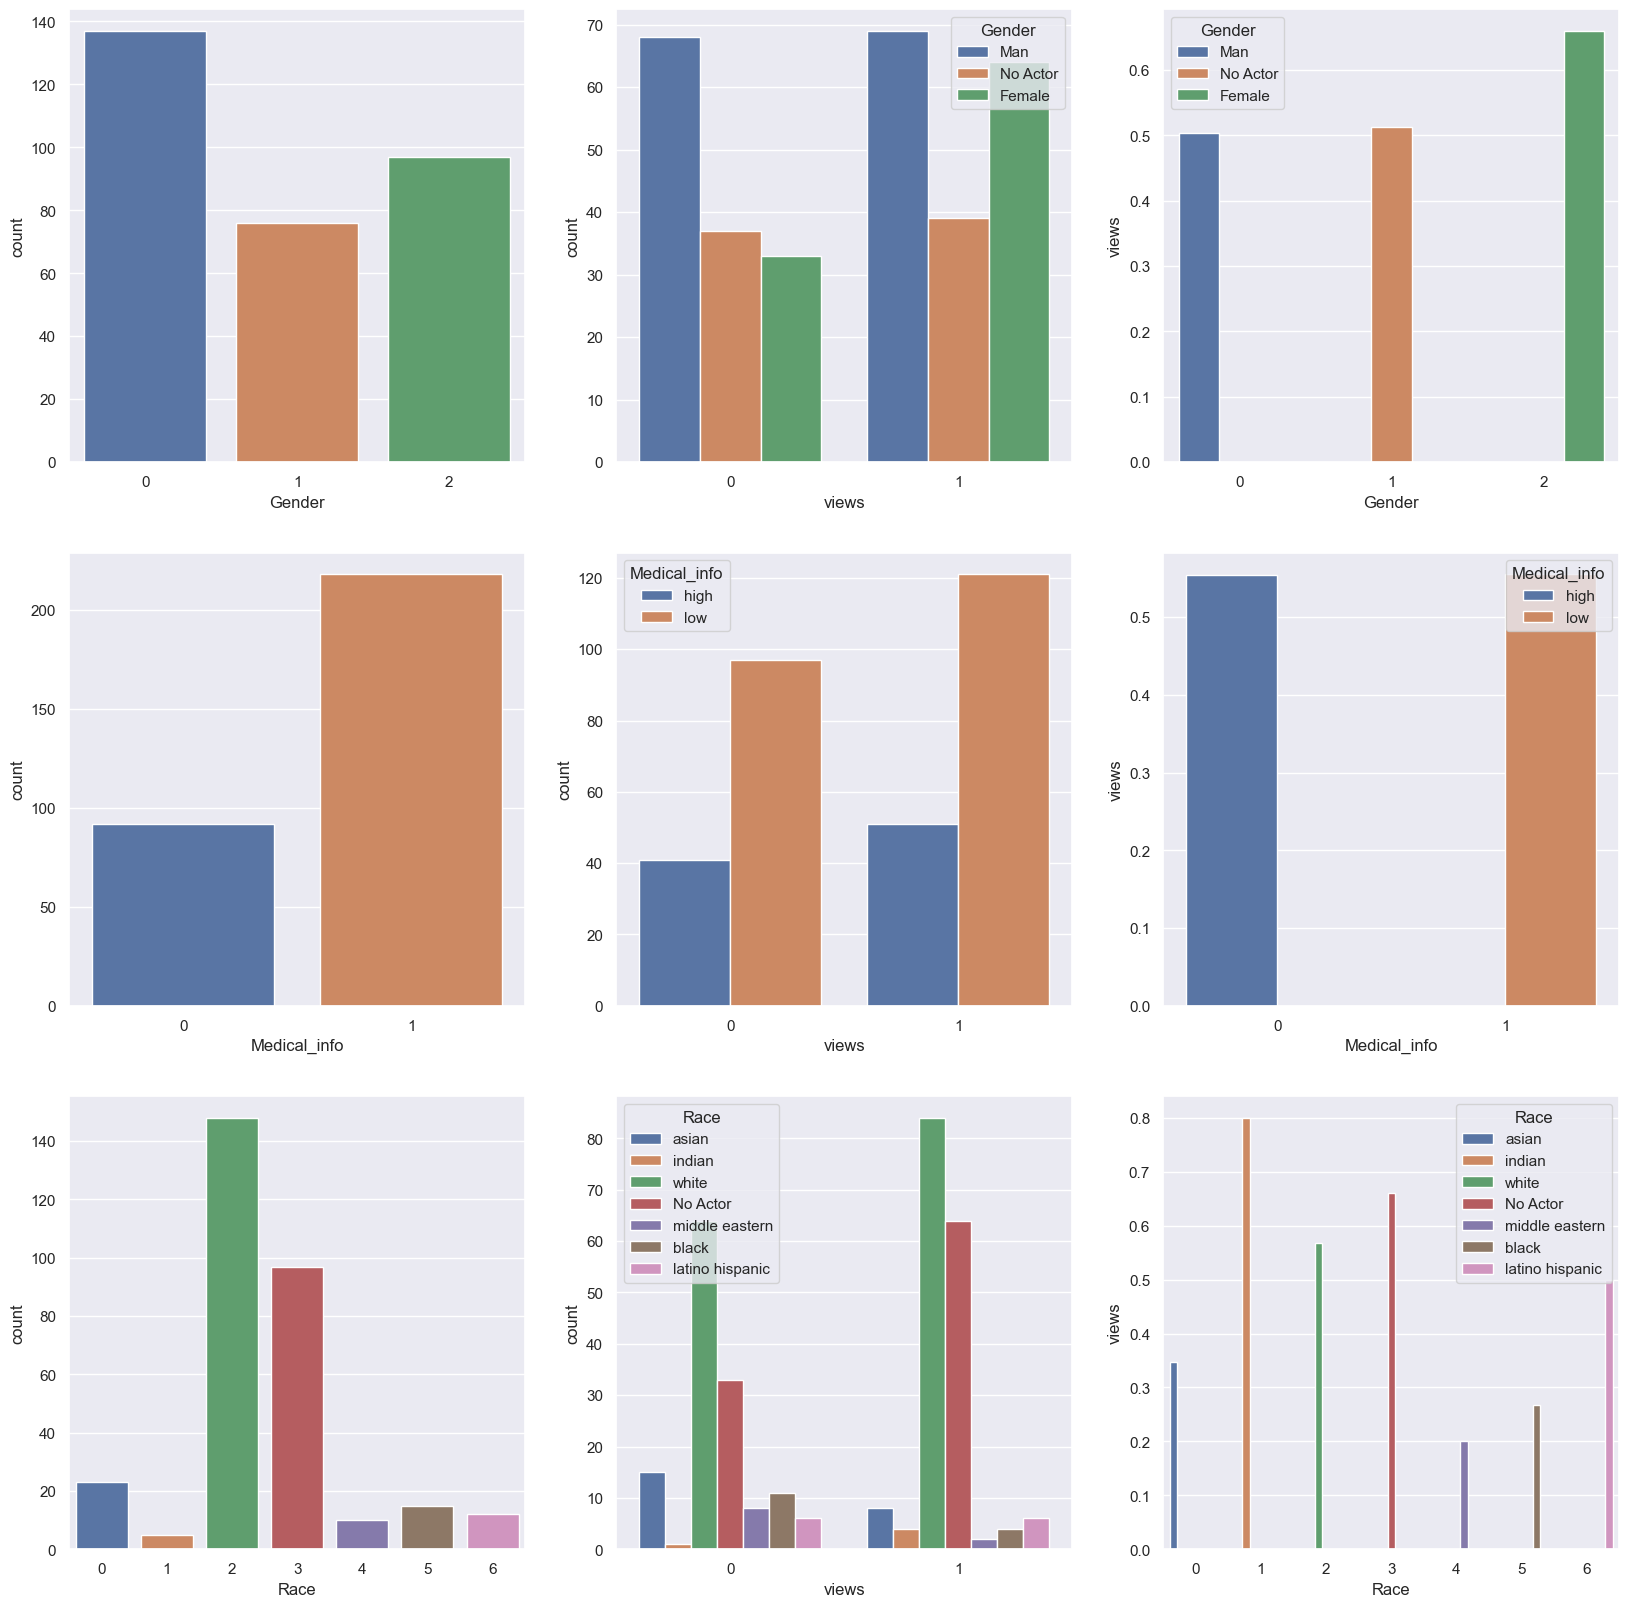

In [158]:
categorial = [('Gender', ['Man', 'No Actor','Female']), 
              ('Medical_info', ['high', 'low']),
              ('Race',['asian', 'indian', 'white', 'No Actor', 'middle eastern', 'black',
       'latino hispanic'])
]

def plotGrid(isCategorial):
    if isCategorial:
        for i, x in enumerate(categorial):
            print(x[0], x[1], i)

        [plotCategorial(x[0], x[1], i) for i, x in enumerate(categorial)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]
        
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=dataset, ax=axes[ax_index][0])
    sns.countplot(x='views', hue=attribute, data=dataset, ax=axes[ax_index][1])
    avg = dataset[[attribute, 'views']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='views', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)
        
fig_categorial, axes = plt.subplots(nrows=len(categorial), ncols=3, figsize=(20, 20))

plotGrid(isCategorial=True)

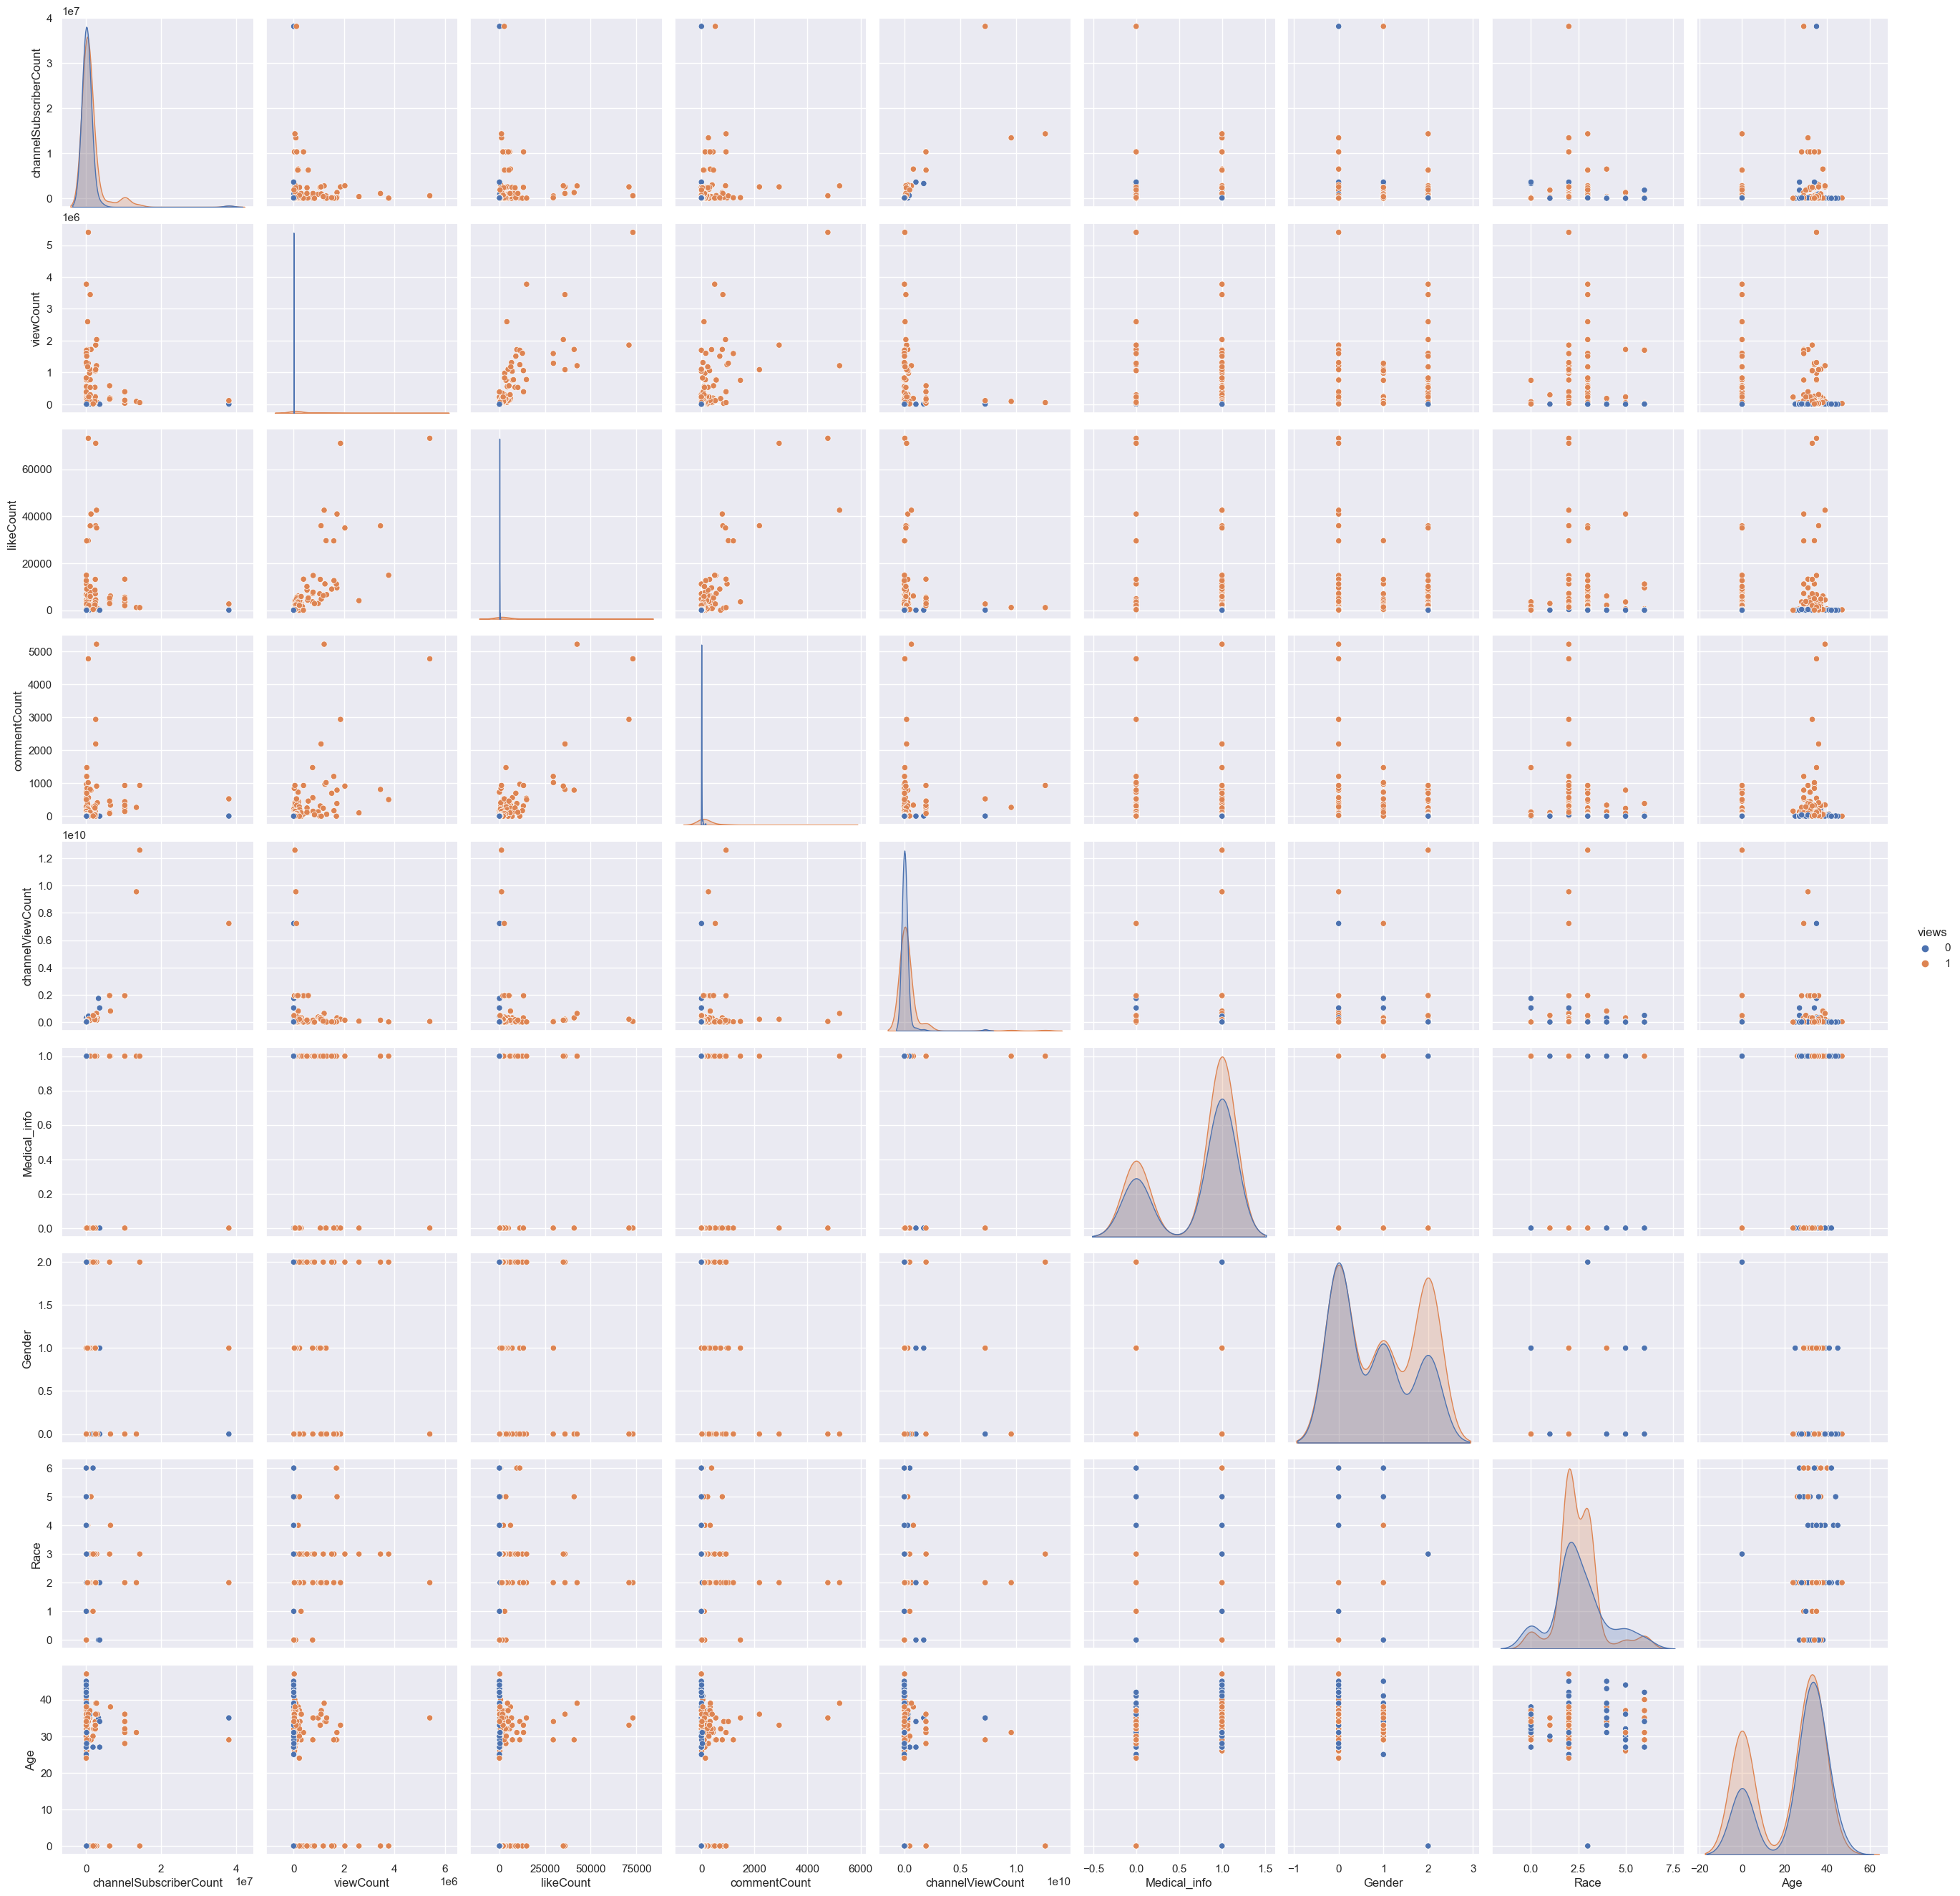

In [159]:
sns.pairplot(dataset,hue="views",size=3)


In [160]:
del dataset['viewCount']

In [161]:

from sklearn.model_selection import train_test_split
X = dataset.drop('views', axis=1)
y = dataset['views']

In [162]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

X['channelSubscriberCount'] = MinMaxScaler().fit_transform(np.array(X['channelSubscriberCount']).reshape(-1,1))
X['likeCount'] = MinMaxScaler().fit_transform(np.array(X['channelSubscriberCount']).reshape(-1,1))
X['commentCount'] = MinMaxScaler().fit_transform(np.array(X['channelSubscriberCount']).reshape(-1,1))
X['channelViewCount'] = MinMaxScaler().fit_transform(np.array(X['channelSubscriberCount']).reshape(-1,1))


In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [164]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': lr.coef_[0]
})
lr_importances = importances.sort_values(by='Importance', ascending=False)

from sklearn.metrics import accuracy_score
Y_pred_lr = lr.predict(X_test)
score_lr = round(accuracy_score(Y_pred_lr,y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 52.56 %


In [165]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
Y_pred_knn=knn.predict(X_test)

score_knn = round(accuracy_score(Y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 62.82 %


In [166]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': dt.feature_importances_
})
dt_importances = importances.sort_values(by='Importance', ascending=False)
Y_pred_dt=dt.predict(X_test)

score_dt = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 74.36 %


In [167]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': rf.feature_importances_
})
rf_importances = importances.sort_values(by='Importance', ascending=False)
Y_pred_dt=rf.predict(X_test)

score_rf = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Random Forest is: "+str(score_rf)+" %")

The accuracy score achieved using Random Forest is: 71.79 %


In [168]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': xgb.feature_importances_
})
xgb_importances = importances.sort_values(by='Importance', ascending=False)

Y_pred_dt=xgb.predict(X_test)

score_xgb = round(accuracy_score(Y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 71.79 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

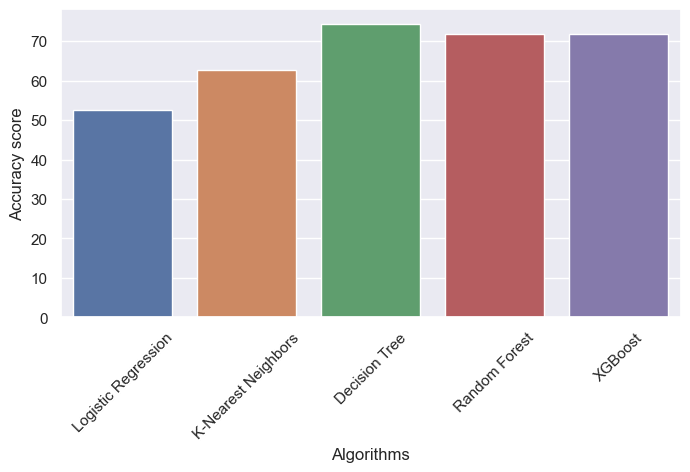

In [172]:
scores = [score_lr,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

sns.set(rc={'figure.figsize':(8,4)})
plt.xlabel("Algorithms")
plt.xticks(rotation=45)
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

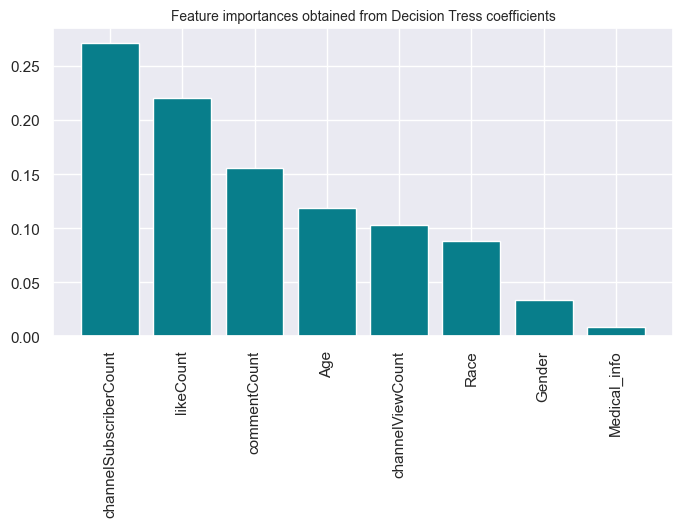

In [170]:
plt.bar(x=dt_importances['Attribute'], height=dt_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from Decision Tress coefficients', size=10)
plt.xticks(rotation=90)
plt.show()